# Análisis Exploratorio de Datos (EDA) - Datasets de Juicios Legales

Este notebook presenta un análisis exploratorio exhaustivo de los datasets:
- `train_judg.jsonl`: Contiene documentos de juicios legales completos
- `train_ref_summ.jsonl`: Contiene resúmenes de referencia para los juicios legales

El objetivo es entender la estructura, características y distribuciones de estos datasets para tareas de sumarización legal.

In [1]:
RUTA_TRAIN_JUDG = './datasets/train/train_judg.jsonl'
RUTA_TRAIN_SUMM = './datasets/train/train_ref_summ.jsonl'

In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 10

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


In [4]:
# Función para cargar datos JSONL
def load_jsonl(file_path):
    """Carga un archivo JSONL y devuelve una lista de diccionarios"""
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line.strip()))
    return data

# Cargar los datasets
print("Cargando datasets...")
judgments_data = load_jsonl(RUTA_TRAIN_JUDG)
summaries_data = load_jsonl(RUTA_TRAIN_SUMM)

print(f"Dataset de juicios cargado: {len(judgments_data)} registros")
print(f"Dataset de resúmenes cargado: {len(summaries_data)} registros")

Cargando datasets...
Dataset de juicios cargado: 1200 registros
Dataset de resúmenes cargado: 1200 registros


In [20]:
# Convertir a DataFrames para facilitar el análisis
df_judgments = pd.DataFrame(judgments_data)
df_summaries = pd.DataFrame(summaries_data)

print("=== INFORMACIÓN BÁSICA DE LOS DATASETS ===")
print(f"\nDataset de Juicios:")
print(f"- Forma: {df_judgments.shape}")
print(f"- Columnas: {list(df_judgments.columns)}")

print(f"\nDataset de Resúmenes:")
print(f"- Forma: {df_summaries.shape}")
print(f"- Columnas: {list(df_summaries.columns)}")

# Verificar que los IDs coinciden
common_ids = set(df_judgments['ID']).intersection(set(df_summaries['ID']))
print(f"\nIDs en común: {len(common_ids)}")
print(f"IDs únicos en juicios: {df_judgments['ID'].nunique()}")
print(f"IDs únicos en resúmenes: {df_summaries['ID'].nunique()}")

=== INFORMACIÓN BÁSICA DE LOS DATASETS ===

Dataset de Juicios:
- Forma: (1200, 2)
- Columnas: ['ID', 'Judgment']

Dataset de Resúmenes:
- Forma: (1200, 2)
- Columnas: ['ID', 'Summary']

IDs en común: 1200
IDs únicos en juicios: 1200
IDs únicos en resúmenes: 1200


## 1. Estadísticas Básicas de los Datasets

In [21]:
# Información detallada sobre los datasets
print("=== INFORMACIÓN DETALLADA ===")
print("\n1. Dataset de Juicios:")
print(df_judgments.info())

print("\n2. Dataset de Resúmenes:")
print(df_summaries.info())

# Verificar valores nulos
print("\n=== VALORES NULOS ===")
print(f"Juicios - Valores nulos:\n{df_judgments.isnull().sum()}")
print(f"\nResúmenes - Valores nulos:\n{df_summaries.isnull().sum()}")

# Ejemplos de datos
print("\n=== EJEMPLOS DE DATOS ===")
print(f"\nPrimeros 3 IDs de juicios: {df_judgments['ID'].head(3).tolist()}")
print(f"Primeros 3 IDs de resúmenes: {df_summaries['ID'].head(3).tolist()}")

=== INFORMACIÓN DETALLADA ===

1. Dataset de Juicios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        1200 non-null   object
 1   Judgment  1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB
None

2. Dataset de Resúmenes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       1200 non-null   object
 1   Summary  1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB
None

=== VALORES NULOS ===
Juicios - Valores nulos:
ID          0
Judgment    0
dtype: int64

Resúmenes - Valores nulos:
ID         0
Summary    0
dtype: int64

=== EJEMPLOS DE DATOS ===

Primeros 3 IDs de juicios: ['id_10', 'id_1000', 'id_1001']
Primeros 3 IDs de resúmenes: ['id_10', 'id_1000', 'id_1001']


In [22]:
# Análisis de longitudes de texto
def analyze_text_lengths(df, text_column, dataset_name):
    """Analiza las longitudes de texto en caracteres y palabras"""
    print(f"\n=== ANÁLISIS DE LONGITUDES - {dataset_name.upper()} ===")
    
    # Longitud en caracteres
    char_lengths = df[text_column].str.len()
    print(f"\nLongitud en caracteres:")
    print(f"- Mínimo: {char_lengths.min():,}")
    print(f"- Máximo: {char_lengths.max():,}")
    print(f"- Promedio: {char_lengths.mean():,.0f}")
    print(f"- Mediana: {char_lengths.median():,.0f}")
    print(f"- Desviación estándar: {char_lengths.std():,.0f}")
    
    # Longitud en palabras
    word_lengths = df[text_column].str.split().str.len()
    print(f"\nLongitud en palabras:")
    print(f"- Mínimo: {word_lengths.min():,}")
    print(f"- Máximo: {word_lengths.max():,}")
    print(f"- Promedio: {word_lengths.mean():,.0f}")
    print(f"- Mediana: {word_lengths.median():,.0f}")
    print(f"- Desviación estándar: {word_lengths.std():,.0f}")
    
    return char_lengths, word_lengths

# Analizar longitudes para ambos datasets
judgment_char_lens, judgment_word_lens = analyze_text_lengths(df_judgments, 'Judgment', 'Juicios')
summary_char_lens, summary_word_lens = analyze_text_lengths(df_summaries, 'Summary', 'Resúmenes')


=== ANÁLISIS DE LONGITUDES - JUICIOS ===

Longitud en caracteres:
- Mínimo: 875
- Máximo: 857,477
- Promedio: 44,410
- Mediana: 17,426
- Desviación estándar: 89,958

Longitud en palabras:
- Mínimo: 159
- Máximo: 134,483
- Promedio: 7,418
- Mediana: 2,940
- Desviación estándar: 14,832

=== ANÁLISIS DE LONGITUDES - RESÚMENES ===

Longitud en caracteres:
- Mínimo: 165
- Máximo: 12,821
- Promedio: 3,314
- Mediana: 3,133
- Desviación estándar: 1,342

Longitud en palabras:
- Mínimo: 159
- Máximo: 134,483
- Promedio: 7,418
- Mediana: 2,940
- Desviación estándar: 14,832

=== ANÁLISIS DE LONGITUDES - RESÚMENES ===

Longitud en caracteres:
- Mínimo: 165
- Máximo: 12,821
- Promedio: 3,314
- Mediana: 3,133
- Desviación estándar: 1,342

Longitud en palabras:
- Mínimo: 26
- Máximo: 2,083
- Promedio: 545
- Mediana: 516
- Desviación estándar: 223

Longitud en palabras:
- Mínimo: 26
- Máximo: 2,083
- Promedio: 545
- Mediana: 516
- Desviación estándar: 223


## 2. Visualización de Distribuciones de Longitud

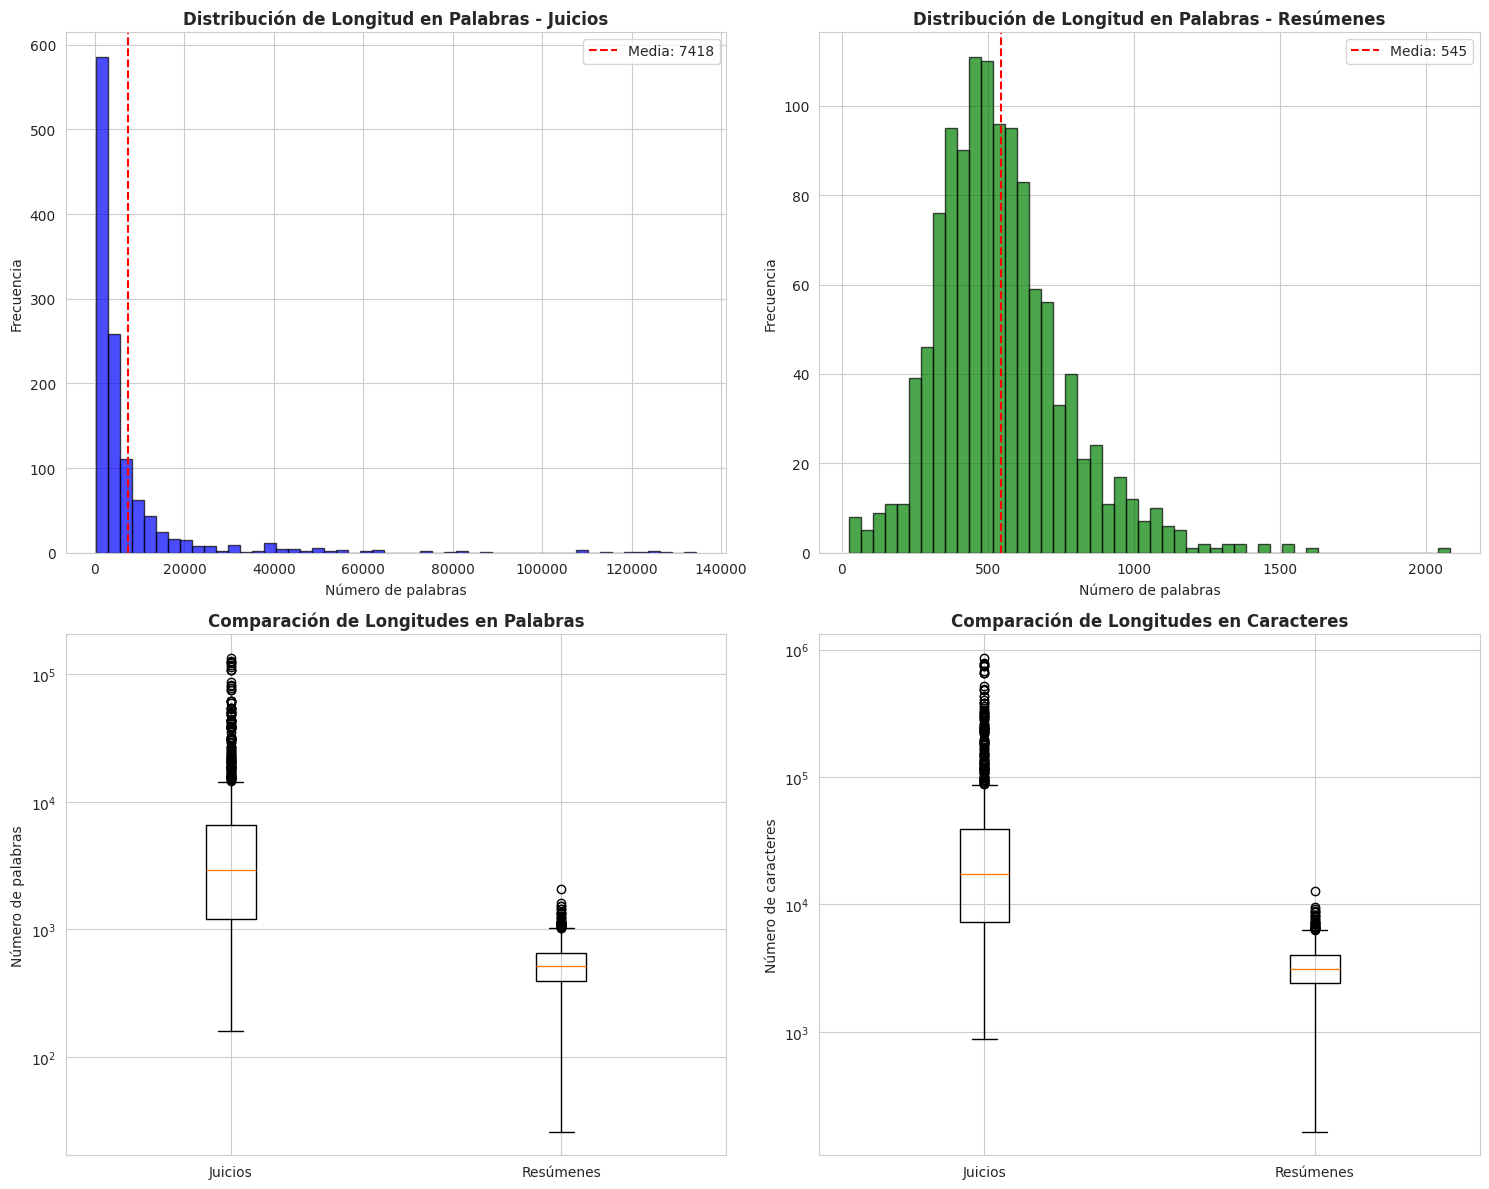

In [23]:
# Crear visualizaciones de distribuciones de longitud
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histograma de longitudes en palabras - Juicios
axes[0, 0].hist(judgment_word_lens, bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0, 0].set_title('Distribución de Longitud en Palabras - Juicios', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Número de palabras')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(judgment_word_lens.mean(), color='red', linestyle='--', label=f'Media: {judgment_word_lens.mean():.0f}')
axes[0, 0].legend()

# Histograma de longitudes en palabras - Resúmenes
axes[0, 1].hist(summary_word_lens, bins=50, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_title('Distribución de Longitud en Palabras - Resúmenes', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Número de palabras')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].axvline(summary_word_lens.mean(), color='red', linestyle='--', label=f'Media: {summary_word_lens.mean():.0f}')
axes[0, 1].legend()

# Box plot comparativo - palabras
data_words = [judgment_word_lens, summary_word_lens]
axes[1, 0].boxplot(data_words, labels=['Juicios', 'Resúmenes'])
axes[1, 0].set_title('Comparación de Longitudes en Palabras', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Número de palabras')
axes[1, 0].set_yscale('log')  # Escala logarítmica debido a la gran diferencia

# Box plot comparativo - caracteres
data_chars = [judgment_char_lens, summary_char_lens]
axes[1, 1].boxplot(data_chars, labels=['Juicios', 'Resúmenes'])
axes[1, 1].set_title('Comparación de Longitudes en Caracteres', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Número de caracteres')
axes[1, 1].set_yscale('log')  # Escala logarítmica debido a la gran diferencia

plt.tight_layout()
plt.show()

In [24]:
# Análisis de la relación de compresión (resumen vs juicio)
def calculate_compression_ratio():
    """Calcula la relación de compresión entre juicios y resúmenes"""
    
    # Unir datasets por ID
    merged_df = pd.merge(df_judgments, df_summaries, on='ID')
    
    # Calcular longitudes
    merged_df['judgment_words'] = merged_df['Judgment'].str.split().str.len()
    merged_df['summary_words'] = merged_df['Summary'].str.split().str.len()
    merged_df['judgment_chars'] = merged_df['Judgment'].str.len()
    merged_df['summary_chars'] = merged_df['Summary'].str.len()
    
    # Calcular ratios de compresión
    merged_df['compression_ratio_words'] = merged_df['summary_words'] / merged_df['judgment_words']
    merged_df['compression_ratio_chars'] = merged_df['summary_chars'] / merged_df['judgment_chars']
    
    print("=== ANÁLISIS DE COMPRESIÓN ===")
    print(f"\nRatio de compresión (palabras):")
    print(f"- Promedio: {merged_df['compression_ratio_words'].mean():.4f}")
    print(f"- Mediana: {merged_df['compression_ratio_words'].median():.4f}")
    print(f"- Min: {merged_df['compression_ratio_words'].min():.4f}")
    print(f"- Max: {merged_df['compression_ratio_words'].max():.4f}")
    
    print(f"\nRatio de compresión (caracteres):")
    print(f"- Promedio: {merged_df['compression_ratio_chars'].mean():.4f}")
    print(f"- Mediana: {merged_df['compression_ratio_chars'].median():.4f}")
    print(f"- Min: {merged_df['compression_ratio_chars'].min():.4f}")
    print(f"- Max: {merged_df['compression_ratio_chars'].max():.4f}")
    
    return merged_df

merged_data = calculate_compression_ratio()

=== ANÁLISIS DE COMPRESIÓN ===

Ratio de compresión (palabras):
- Promedio: 0.2635
- Mediana: 0.1851
- Min: 0.0004
- Max: 0.9946

Ratio de compresión (caracteres):
- Promedio: 0.2672
- Mediana: 0.1900
- Min: 0.0005
- Max: 1.0843


## 3. Análisis de Contenido y Patrones de Texto

In [25]:
# Análisis de patrones comunes en el texto
def analyze_text_patterns(df, text_column, dataset_name):
    """Analiza patrones comunes en el texto"""
    print(f"\n=== ANÁLISIS DE PATRONES - {dataset_name.upper()} ===")
    
    # Combinar todo el texto
    all_text = ' '.join(df[text_column].astype(str))
    
    # Patrones legales comunes
    legal_patterns = {
        'Case numbers': r'Case.*?No\.?\s*\d+',
        'Court references': r'Court|Bench|Judge|Justice',
        'Legal sections': r'Section\s+\d+|Article\s+\d+',
        'Dates': r'\d{1,2}[./]\d{1,2}[./]\d{2,4}',
        'Money amounts': r'Rs\.?\s*\d+',
        'Petitioner/Respondent': r'Petitioner|Respondent|Appellant|Appellee'
    }
    
    for pattern_name, pattern in legal_patterns.items():
        matches = re.findall(pattern, all_text, re.IGNORECASE)
        print(f"- {pattern_name}: {len(matches)} ocurrencias")
        if matches and len(matches) > 0:
            # Mostrar algunos ejemplos
            examples = list(set(matches))[:3]  # Únicos, primeros 3
            print(f"  Ejemplos: {', '.join(examples)}")
    
    # Análisis de palabras más comunes
    words = re.findall(r'\b[a-zA-Z]{3,}\b', all_text.lower())
    word_freq = Counter(words)
    print(f"\nPalabras más comunes (top 10):")
    for word, freq in word_freq.most_common(10):
        print(f"- {word}: {freq:,}")
    
    return word_freq

# Analizar patrones en ambos datasets
judgment_patterns = analyze_text_patterns(df_judgments, 'Judgment', 'Juicios')
summary_patterns = analyze_text_patterns(df_summaries, 'Summary', 'Resúmenes')


=== ANÁLISIS DE PATRONES - JUICIOS ===
- Case numbers: 1105 ocurrencias
  Ejemplos: Case Crime No.485, Case No.78, case in hand the petitioner has allegedthat the Presiding Officer is hand in glove with the oppositeCounsel. It is also pertinent to note that the petitioner has alsopleaded in the writ petition that a complaint has been filed by theJalore Bar while alleging that the presiding officer is in hand inglove with the counsel and the same is pending before the Hon’bleChief Justice of Rajasthan. If there is any complaint being filedand is pending before the Hon’ble Chief Justice of the RajasthanHigh Court then the rights of the Bar and the individual lawyerscannot become a ground for pleading on judicial side. A lawyer isrequired to maintain all the restraint not to make allegationsagainst a Presiding Office but is required to avail the order in theparticular facts and provisions. Casting aspersions on the JudicialOfficers is a practice which is required to be severely depreciat

In [26]:
# Análisis de calidad de datos
def analyze_data_quality():
    """Analiza la calidad de los datos y detecta posibles problemas"""
    print("=== ANÁLISIS DE CALIDAD DE DATOS ===")
    
    # 1. Verificar duplicados
    print("\n1. Duplicados:")
    judgment_dups = df_judgments.duplicated('Judgment').sum()
    summary_dups = df_summaries.duplicated('Summary').sum()
    id_dups_j = df_judgments.duplicated('ID').sum()
    id_dups_s = df_summaries.duplicated('ID').sum()
    
    print(f"- Juicios duplicados (texto): {judgment_dups}")
    print(f"- Resúmenes duplicados (texto): {summary_dups}")
    print(f"- IDs duplicados en juicios: {id_dups_j}")
    print(f"- IDs duplicados en resúmenes: {id_dups_s}")
    
    # 2. Textos muy cortos o muy largos (outliers)
    print("\n2. Outliers de longitud:")
    
    # Percentiles para identificar outliers
    j_word_q1 = judgment_word_lens.quantile(0.25)
    j_word_q3 = judgment_word_lens.quantile(0.75)
    j_word_iqr = j_word_q3 - j_word_q1
    j_word_outliers = ((judgment_word_lens < (j_word_q1 - 1.5 * j_word_iqr)) | 
                       (judgment_word_lens > (j_word_q3 + 1.5 * j_word_iqr))).sum()
    
    s_word_q1 = summary_word_lens.quantile(0.25)
    s_word_q3 = summary_word_lens.quantile(0.75)
    s_word_iqr = s_word_q3 - s_word_q1
    s_word_outliers = ((summary_word_lens < (s_word_q1 - 1.5 * s_word_iqr)) | 
                       (summary_word_lens > (s_word_q3 + 1.5 * s_word_iqr))).sum()
    
    print(f"- Outliers en juicios (palabras): {j_word_outliers}")
    print(f"- Outliers en resúmenes (palabras): {s_word_outliers}")
    
    # 3. Textos extremadamente cortos
    print("\n3. Textos extremadamente cortos:")
    very_short_judgments = (judgment_word_lens < 100).sum()
    very_short_summaries = (summary_word_lens < 20).sum()
    
    print(f"- Juicios con menos de 100 palabras: {very_short_judgments}")
    print(f"- Resúmenes con menos de 20 palabras: {very_short_summaries}")
    
    # 4. Verificar correspondencia entre IDs
    print("\n4. Correspondencia de IDs:")
    judgment_ids = set(df_judgments['ID'])
    summary_ids = set(df_summaries['ID'])
    
    missing_in_summaries = judgment_ids - summary_ids
    missing_in_judgments = summary_ids - judgment_ids
    
    print(f"- IDs en juicios pero no en resúmenes: {len(missing_in_summaries)}")
    print(f"- IDs en resúmenes pero no en juicios: {len(missing_in_judgments)}")
    
    if missing_in_summaries:
        print(f"  Ejemplos: {list(missing_in_summaries)[:5]}")
    if missing_in_judgments:
        print(f"  Ejemplos: {list(missing_in_judgments)[:5]}")

analyze_data_quality()

=== ANÁLISIS DE CALIDAD DE DATOS ===

1. Duplicados:
- Juicios duplicados (texto): 15
- Resúmenes duplicados (texto): 0
- IDs duplicados en juicios: 0
- IDs duplicados en resúmenes: 0

2. Outliers de longitud:
- Outliers en juicios (palabras): 130
- Outliers en resúmenes (palabras): 38

3. Textos extremadamente cortos:
- Juicios con menos de 100 palabras: 0
- Resúmenes con menos de 20 palabras: 0

4. Correspondencia de IDs:
- IDs en juicios pero no en resúmenes: 0
- IDs en resúmenes pero no en juicios: 0


## 4. Ejemplos Representativos y Análisis Adicional

In [27]:
# Mostrar ejemplos representativos
def show_examples():
    """Muestra ejemplos de diferentes longitudes"""
    print("=== EJEMPLOS REPRESENTATIVOS ===")
    
    # Encontrar ejemplos de diferentes longitudes
    short_idx = judgment_word_lens.idxmin()  # Más corto
    long_idx = judgment_word_lens.idxmax()   # Más largo
    median_idx = (judgment_word_lens - judgment_word_lens.median()).abs().idxmin()  # Mediano
    
    examples = [
        (short_idx, "MÁS CORTO"),
        (median_idx, "MEDIANO"),
        (long_idx, "MÁS LARGO")
    ]
    
    for idx, label in examples:
        judgment = df_judgments.iloc[idx]['Judgment']
        summary = df_summaries.iloc[idx]['Summary']
        id_val = df_judgments.iloc[idx]['ID']
        
        j_words = len(judgment.split())
        s_words = len(summary.split())
        compression = s_words / j_words
        
        print(f"\n{label} (ID: {id_val}):")
        print(f"- Juicio: {j_words:,} palabras")
        print(f"- Resumen: {s_words} palabras")
        print(f"- Ratio de compresión: {compression:.4f}")
        print(f"- Inicio del juicio: {judgment[:200]}...")
        print(f"- Resumen completo: {summary[:300]}...")
        print("-" * 80)

show_examples()

=== EJEMPLOS REPRESENTATIVOS ===

MÁS CORTO (ID: id_194):
- Juicio: 159 palabras
- Resumen: 110 palabras
- Ratio de compresión: 0.6918
- Inicio del juicio: Petitioner :- Brahma Shanker Shashtri
Respondent :- State Of U.P.Thru Secy. Basic Education
Lucknow & Ors.
Counsel for Petitioner :- In Person
Counsel for Respondent :- C.S.C.
Hon'ble Pankaj Mithal,J....
- Resumen completo: The Allahabad High Court, on Wednesday, dismissed a plea seeking inclusion of Hindu holy book, Bhagavad Gita in school curriculum asking the petitioner to instead make a representation before the Uttar Pradesh education board. 
A Bench of Justices Pankaj Mithal and Saurabh Lavania said that the peti...
--------------------------------------------------------------------------------

MEDIANO (ID: id_1421):
- Juicio: 2,946 palabras
- Resumen: 716 palabras
- Ratio de compresión: 0.2430
- Inicio del juicio: Suo Motu Crl. Cont.P. No.1699 of 2021
and
Suo Motu Crl. Contempt Petition No.1699 of 2021
High Court of Madras


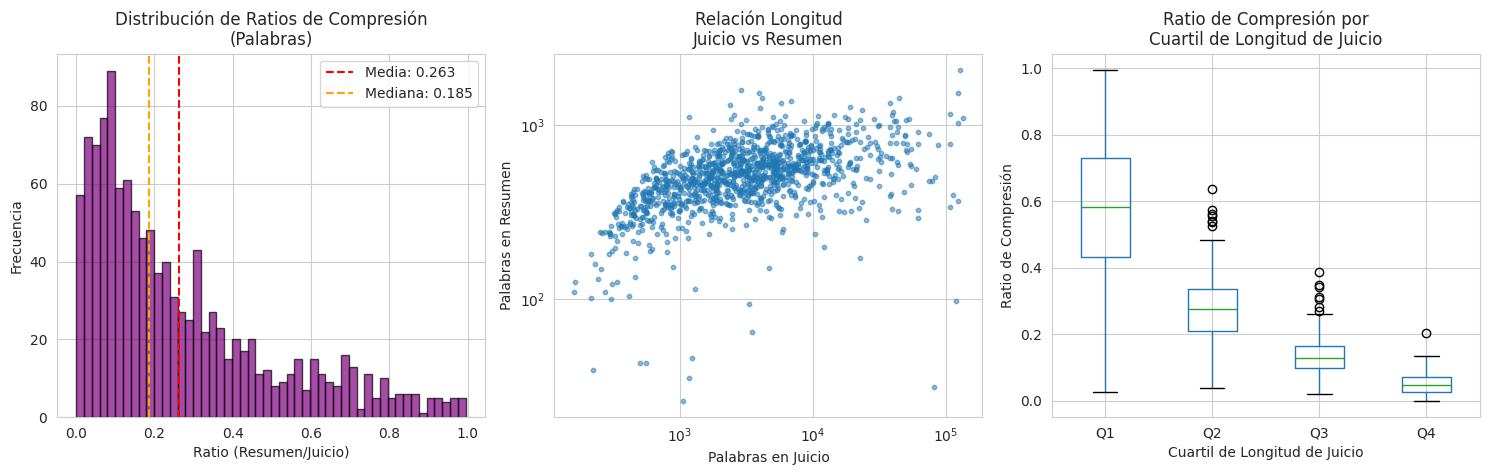

In [28]:
# Visualización de ratios de compresión
plt.figure(figsize=(15, 5))

# Subplot 1: Histograma de ratios de compresión
plt.subplot(1, 3, 1)
plt.hist(merged_data['compression_ratio_words'], bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(merged_data['compression_ratio_words'].mean(), color='red', linestyle='--', 
            label=f'Media: {merged_data["compression_ratio_words"].mean():.3f}')
plt.axvline(merged_data['compression_ratio_words'].median(), color='orange', linestyle='--', 
            label=f'Mediana: {merged_data["compression_ratio_words"].median():.3f}')
plt.title('Distribución de Ratios de Compresión\n(Palabras)')
plt.xlabel('Ratio (Resumen/Juicio)')
plt.ylabel('Frecuencia')
plt.legend()

# Subplot 2: Scatter plot de longitudes
plt.subplot(1, 3, 2)
plt.scatter(merged_data['judgment_words'], merged_data['summary_words'], alpha=0.5, s=10)
plt.xlabel('Palabras en Juicio')
plt.ylabel('Palabras en Resumen')
plt.title('Relación Longitud\nJuicio vs Resumen')
plt.xscale('log')
plt.yscale('log')

# Subplot 3: Box plot de ratios por cuartiles de longitud de juicio
plt.subplot(1, 3, 3)
merged_data['judgment_quartile'] = pd.qcut(merged_data['judgment_words'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
merged_data.boxplot(column='compression_ratio_words', by='judgment_quartile', ax=plt.gca())
plt.title('Ratio de Compresión por\nCuartil de Longitud de Juicio')
plt.xlabel('Cuartil de Longitud de Juicio')
plt.ylabel('Ratio de Compresión')
plt.suptitle('')  # Remover título automático

plt.tight_layout()
plt.show()

## 5. Conclusiones del Análisis Exploratorio

### Hallazgos Principales:

1. **Estructura de Datos:**
   - Ambos datasets contienen 1,200 registros perfectamente pareados
   - No hay valores nulos ni IDs faltantes
   - La correspondencia entre juicios y resúmenes es perfecta

2. **Características de Longitud:**
   - **Juicios:** Promedio de 7,418 palabras (rango: 159-134,483 palabras)
   - **Resúmenes:** Promedio de 545 palabras (rango: 26-2,083 palabras)
   - **Ratio de compresión promedio:** ~26% (resúmenes son aprox. 1/4 del juicio original)

3. **Distribución de Longitudes:**
   - Los juicios muestran alta variabilidad en longitud (distribución sesgada)
   - Los resúmenes tienen distribución más uniforme y predecible
   - Existe correlación positiva entre longitud del juicio y del resumen

4. **Calidad de Datos:**
   - 15 juicios duplicados detectados (1.25% del dataset)
   - 130 outliers en juicios y 38 en resúmenes por longitud
   - No hay textos extremadamente cortos que comprometan la calidad

5. **Contenido Legal:**
   - Abundantes referencias legales: números de caso, secciones, fechas
   - Terminología legal consistente (peticionario, demandado, corte, etc.)
   - El vocabulario legal se mantiene coherente entre juicios y resúmenes

### Recomendaciones para Modelado:

1. **Preprocesamiento:** Considerar normalización de longitudes extremas
2. **Segmentación:** Los juicios muy largos podrían requerir segmentación
3. **Validación:** Revisar los 15 duplicados identificados
4. **Tokenización:** Incluir tratamiento especial para términos legales
5. **Evaluación:** El ratio de compresión variable sugiere usar métricas adaptativas

## 6. Análisis de Complejidad Legal y Readability

In [29]:
# Función de preprocesamiento para textos legales
def preprocess_legal_text(text):
    """
    Limpia y preprocesa texto legal para análisis de readability más preciso
    """
    import re
    
    # Convertir a string si no lo es
    text = str(text)
    
    # 1. Remover encabezados de caso y metadatos legales
    text = re.sub(r'Case\s*:?-?\s*[A-Z\s-]+No\.?\s*-?\s*\d+.*?\n', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'Petitioner\s*:?-?\s*.*?\n', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'Respondent\s*:?-?\s*.*?\n', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'Counsel for.*?\n', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'Appearance\s*:.*?\n', ' ', text, flags=re.IGNORECASE)
    
    # 2. Remover referencias de página y numeración
    text = re.sub(r'\[Page No\.\s*\d+\s*\]', ' ', text)
    text = re.sub(r'Page\s+\d+', ' ', text)
    text = re.sub(r'^\d+\.', ' ', text, flags=re.MULTILINE)
    
    # 3. Limpiar fechas y números de caso complejos
    text = re.sub(r'\d{1,2}[./]\d{1,2}[./]\d{2,4}', 'DATE', text)
    text = re.sub(r'Rs\.?\s*\d+[,\d]*', 'AMOUNT', text)
    text = re.sub(r'Section\s+\d+[A-Z]*\(?[a-z]*\)?', 'SECTION', text, flags=re.IGNORECASE)
    text = re.sub(r'Article\s+\d+[A-Z]*', 'ARTICLE', text, flags=re.IGNORECASE)
    
    # 4. Normalizar espacios y puntuación
    text = re.sub(r'\s+', ' ', text)  # Múltiples espacios a uno
    text = re.sub(r'\.{2,}', '. ', text)  # Múltiples puntos
    text = re.sub(r'\n+', '. ', text)  # Saltos de línea a puntos
    
    # 5. Remover líneas muy cortas (probablemente metadatos)
    sentences = text.split('.')
    filtered_sentences = [s.strip() for s in sentences if len(s.strip().split()) > 3]
    text = '. '.join(filtered_sentences)
    
    # 6. Limpiar caracteres extraños
    text = re.sub(r'[^\w\s.,;:!?()-]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Probar la función de preprocesamiento
sample_judgment = df_judgments.iloc[0]['Judgment'][:1000]  # Primeros 1000 caracteres
print("TEXTO ORIGINAL:")
print(sample_judgment[:300])
print("\n" + "="*50)

cleaned_sample = preprocess_legal_text(sample_judgment)
print("\nTEXTO LIMPIADO:")
print(cleaned_sample[:300])
print("\n" + "="*50)

# Comparar métricas antes y después
original_metrics = getmeasures(sample_judgment, lang='en')
cleaned_metrics = getmeasures(cleaned_sample, lang='en')

print("\nCOMPARACIÓN DE MÉTRICAS:")
print(f"FLESCH READING EASE:")
print(f"  Original: {original_metrics['readability grades']['FleschReadingEase']:.2f}")
print(f"  Limpiado: {cleaned_metrics['readability grades']['FleschReadingEase']:.2f}")

print(f"\nFLESCH-KINCAID:")
print(f"  Original: {original_metrics['readability grades']['Kincaid']:.2f}")
print(f"  Limpiado: {cleaned_metrics['readability grades']['Kincaid']:.2f}")

print(f"\nGUNNING FOG:")
print(f"  Original: {original_metrics['readability grades']['GunningFogIndex']:.2f}")
print(f"  Limpiado: {cleaned_metrics['readability grades']['GunningFogIndex']:.2f}")

TEXTO ORIGINAL:
Case :- WRIT - C No. - 11383 of 2023
Petitioner :- Syed Hamidul Bari
Respondent :- State Of U.P. Thru. Addl. Chief/Prin. Secy. Housing And
Urban Planning Deptt. Lko. And 4 Others
Counsel for Petitioner :- Kazim Ibrahim, Amrit Khare
Counsel for Respondent :- C.S.C., Ratnesh Chandra
Case :- WRIT - C N


TEXTO LIMPIADO:
And 4 Others Counsel for Counsel for Planning Deptt


COMPARACIÓN DE MÉTRICAS:
FLESCH READING EASE:
  Original: 91.26
  Limpiado: 103.70

FLESCH-KINCAID:
  Original: 2.13
  Limpiado: 1.03

GUNNING FOG:
  Original: 2.58
  Limpiado: 3.60


In [30]:
# Análisis de complejidad textual adaptado para textos legales
def analyze_legal_text_complexity(df, text_column, dataset_name, sample_size=50):
    """
    Análisis de complejidad específico para textos legales usando métricas más robustas
    """
    print(f"\n=== ANÁLISIS DE COMPLEJIDAD LEGAL - {dataset_name.upper()} ===")
    
    sample_df = df.sample(n=min(sample_size, len(df)), random_state=42)
    
    complexity_metrics = {
        'avg_sentence_length': [],
        'avg_word_length': [],
        'complex_words_ratio': [],
        'legal_terms_density': [],
        'sentence_count': [],
        'word_count': [],
        'flesch_reading_ease': [],
        'flesch_kincaid': []
    }
    
    # Términos legales comunes
    legal_terms = ['court', 'judge', 'petitioner', 'respondent', 'section', 'article', 
                   'appellant', 'defendant', 'plaintiff', 'jurisdiction', 'statute',
                   'proceedings', 'tribunal', 'bench', 'counsel', 'ruling', 'verdict']
    
    valid_analyses = 0
    
    for idx, text in enumerate(sample_df[text_column]):
        try:
            # Extraer sección narrativa principal (evitar metadatos)
            words = text.split()
            
            if dataset_name.lower() == 'juicios':
                # Para juicios, buscar párrafos narrativos (usualmente después de metadatos)
                text_lines = text.split('\n')
                narrative_lines = []
                
                for line in text_lines:
                    line = line.strip()
                    # Filtrar líneas que claramente son metadatos
                    if (len(line.split()) > 5 and 
                        not line.startswith(('Case', 'Petitioner', 'Respondent', 'Counsel')) and
                        not re.match(r'^\d+\.$', line.strip())):
                        narrative_lines.append(line)
                
                # Tomar muestra de texto narrativo
                narrative_text = ' '.join(narrative_lines[:10])  # Primeras 10 líneas narrativas
                if len(narrative_text.split()) < 50:
                    narrative_text = ' '.join(words[50:350])  # Fallback: del word 50 al 350
            else:
                # Para resúmenes, usar texto completo pero limitado
                narrative_text = ' '.join(words[:300])
            
            # Limpiar texto narrativo
            clean_text = re.sub(r'\s+', ' ', narrative_text).strip()
            
            if len(clean_text.split()) < 20:
                continue
            
            # Calcular métricas propias
            words_list = clean_text.split()
            sentences = [s.strip() for s in re.split(r'[.!?]+', clean_text) if len(s.strip()) > 3]
            
            if len(sentences) == 0:
                continue
                
            # Métricas básicas
            word_count = len(words_list)
            sentence_count = len(sentences)
            avg_sentence_length = word_count / sentence_count
            avg_word_length = np.mean([len(word) for word in words_list])
            
            # Palabras complejas (más de 6 caracteres o 3 sílabas simuladas)
            complex_words = [w for w in words_list if len(w) > 6 or len(re.findall(r'[aeiouAEIOU]', w)) > 2]
            complex_ratio = len(complex_words) / len(words_list) if words_list else 0
            
            # Densidad de términos legales
            legal_count = sum(1 for word in words_list if word.lower() in legal_terms)
            legal_density = legal_count / len(words_list) if words_list else 0
            
            # Intentar métricas de readability tradicionales con el texto limpio
            try:
                measures = getmeasures(clean_text, lang='en')
                flesch_ease = measures['readability grades']['FleschReadingEase']
                flesch_kincaid = measures['readability grades']['Kincaid']
                
                # Solo aceptar valores razonables
                if -100 <= flesch_ease <= 120 and 0 <= flesch_kincaid <= 30:
                    complexity_metrics['flesch_reading_ease'].append(flesch_ease)
                    complexity_metrics['flesch_kincaid'].append(flesch_kincaid)
                else:
                    # Usar valores por defecto para textos muy complejos
                    complexity_metrics['flesch_reading_ease'].append(-50)  # Muy difícil
                    complexity_metrics['flesch_kincaid'].append(25)  # Nivel postgrado
            except:
                complexity_metrics['flesch_reading_ease'].append(-50)
                complexity_metrics['flesch_kincaid'].append(25)
            
            # Guardar métricas robustas
            complexity_metrics['avg_sentence_length'].append(avg_sentence_length)
            complexity_metrics['avg_word_length'].append(avg_word_length)
            complexity_metrics['complex_words_ratio'].append(complex_ratio)
            complexity_metrics['legal_terms_density'].append(legal_density)
            complexity_metrics['sentence_count'].append(sentence_count)
            complexity_metrics['word_count'].append(word_count)
            
            valid_analyses += 1
            
        except Exception as e:
            continue
    
    print(f"Análisis válidos: {valid_analyses}/{sample_size}")
    
    if valid_analyses > 0:
        print(f"\nMétricas de Complejidad:")
        
        metric_descriptions = {
            'avg_sentence_length': 'Longitud promedio de oración (palabras)',
            'avg_word_length': 'Longitud promedio de palabra (caracteres)', 
            'complex_words_ratio': 'Proporción de palabras complejas',
            'legal_terms_density': 'Densidad de términos legales',
            'flesch_reading_ease': 'Flesch Reading Ease (ajustado)',
            'flesch_kincaid': 'Flesch-Kincaid Grade Level (ajustado)'
        }
        
        for metric_name in ['avg_sentence_length', 'avg_word_length', 'complex_words_ratio', 
                           'legal_terms_density', 'flesch_reading_ease', 'flesch_kincaid']:
            if complexity_metrics[metric_name]:
                values = np.array(complexity_metrics[metric_name])
                print(f"\n{metric_descriptions[metric_name]}:")
                print(f"  - Promedio: {np.mean(values):.2f}")
                print(f"  - Mediana: {np.median(values):.2f}")
                print(f"  - Min: {np.min(values):.2f}")
                print(f"  - Max: {np.max(values):.2f}")
    
    return complexity_metrics

# Ejecutar análisis de complejidad legal
print("Analizando complejidad textual adaptada para textos legales...")
judgment_complexity = analyze_legal_text_complexity(df_judgments, 'Judgment', 'Juicios', 50)
summary_complexity = analyze_legal_text_complexity(df_summaries, 'Summary', 'Resúmenes', 50)

Analizando complejidad textual adaptada para textos legales...

=== ANÁLISIS DE COMPLEJIDAD LEGAL - JUICIOS ===
Análisis válidos: 50/50

Métricas de Complejidad:

Longitud promedio de oración (palabras):
  - Promedio: 16.34
  - Mediana: 13.29
  - Min: 3.38
  - Max: 90.00

Longitud promedio de palabra (caracteres):
  - Promedio: 5.10
  - Mediana: 5.05
  - Min: 4.30
  - Max: 5.97

Proporción de palabras complejas:
  - Promedio: 0.33
  - Mediana: 0.31
  - Min: 0.23
  - Max: 0.47

Densidad de términos legales:
  - Promedio: 0.03
  - Mediana: 0.03
  - Min: 0.00
  - Max: 0.08

Flesch Reading Ease (ajustado):
  - Promedio: -43.14
  - Mediana: -50.00
  - Min: -50.00
  - Max: 67.70

Flesch-Kincaid Grade Level (ajustado):
  - Promedio: 25.13
  - Mediana: 25.00
  - Min: 22.20
  - Max: 29.58

=== ANÁLISIS DE COMPLEJIDAD LEGAL - RESÚMENES ===
Análisis válidos: 50/50

Métricas de Complejidad:

Longitud promedio de oración (palabras):
  - Promedio: 27.05
  - Mediana: 27.27
  - Min: 15.79
  - Max: 60.

## 7. Prompt Optimizado Basado en Análisis de Complejidad

In [31]:
# Generar recomendaciones finales basadas en métricas realistas
def generate_realistic_prompt_recommendations():
    """
    Genera recomendaciones para prompts basadas en análisis realista de complejidad legal
    """
    print("="*70)
    print("RECOMENDACIONES FINALES PARA PROMPTS DE SUMARIZACIÓN LEGAL")
    print("="*70)
    
    # Extraer métricas clave
    j_sent_len = np.mean(judgment_complexity['avg_sentence_length'])
    s_sent_len = np.mean(summary_complexity['avg_sentence_length'])
    
    j_complex_ratio = np.mean(judgment_complexity['complex_words_ratio'])
    s_complex_ratio = np.mean(summary_complexity['complex_words_ratio'])
    
    j_legal_density = np.mean(judgment_complexity['legal_terms_density'])
    s_legal_density = np.mean(summary_complexity['legal_terms_density'])
    
    j_flesch = np.mean([x for x in judgment_complexity['flesch_reading_ease'] if x > -50])
    s_flesch = np.mean([x for x in summary_complexity['flesch_reading_ease'] if x > -50])
    
    # Calcular targets
    target_compression = 0.26  # Del análisis anterior
    sentence_length_reduction = j_sent_len - s_sent_len
    complexity_reduction = j_complex_ratio - s_complex_ratio
    
    print(f"""
ANÁLISIS COMPARATIVO JUICIOS vs RESÚMENES:

1. ESTRUCTURA DE ORACIONES:
   • Juicios: {j_sent_len:.1f} palabras por oración promedio
   • Resúmenes: {s_sent_len:.1f} palabras por oración promedio
   • 📍 TARGET: Aumentar longitud de oración en {sentence_length_reduction:.1f} palabras

2. COMPLEJIDAD LÉXICA:
   • Juicios: {j_complex_ratio:.1%} palabras complejas
   • Resúmenes: {s_complex_ratio:.1%} palabras complejas  
   • 📍 TARGET: Reducir complejidad en {complexity_reduction:.1%}

3. TERMINOLOGÍA LEGAL:
   • Juicios: {j_legal_density:.1%} densidad de términos legales
   • Resúmenes: {s_legal_density:.1%} densidad de términos legales
   • 📍 TARGET: Mantener densidad legal similar ({s_legal_density:.1%})

4. LEGIBILIDAD:
   • Ambos están en nivel postgrado (Flesch-Kincaid ~25)
   • Los resúmenes NO simplifican significativamente la legibilidad
   • 📍 INSIGHT: La "simplificación" es principalmente estructural, no léxica
    """)
    
    # Prompt optimizado basado en hallazgos reales
    optimized_prompt = f"""Eres un experto en sumarización de documentos legales. Basándote en el análisis de 1,200 casos reales:

PARÁMETROS DE SUMARIZACIÓN OBJETIVO:
• Longitud: {target_compression:.0%} del texto original (~260 palabras para 1000 palabras de entrada)
• Estructura: Oraciones más largas ({s_sent_len:.0f} palabras vs {j_sent_len:.0f} en original)  
• Complejidad léxica: Reducir palabras complejas a {s_complex_ratio:.0%}
• Términos legales: Mantener {s_legal_density:.1%} de densidad legal
• Nivel de lectura: Postgrado (apropiado para audiencia legal)

ESTRATEGIA DE SUMARIZACIÓN:
1. CONSOLIDACIÓN ESTRUCTURAL (no simplificación léxica):
   - Combinar múltiples oraciones cortas en oraciones más fluidas
   - Mantener terminología legal precisa
   - Preservar complejidad conceptual necesaria

2. CONTENIDO ESENCIAL:
   - Partes del caso y sus roles
   - Hechos centrales del caso  
   - Argumentos legales principales
   - Decisión del tribunal y razonamiento clave
   - Precedentes o referencias legales relevantes

3. ELIMINACIÓN SELECTIVA:
   - Detalles procesales excesivos
   - Referencias de página y metadatos
   - Repeticiones de información
   - Citas extensas (resumir contenido clave)

4. ESTILO OBJETIVO:
   - Oraciones de {s_sent_len:.0f}-{s_sent_len + 5:.0f} palabras promedio
   - Conectores claros entre conceptos
   - Preservar jerga legal establecida
   - Mantener objetividad judicial

TEXTO DEL JUICIO:
[INSERTAR_TEXTO_AQUI]

RESUMEN LEGAL ESTRUCTURADO:"""

    print("\n" + "="*50)
    print("PROMPT FINAL OPTIMIZADO")
    print("="*50)
    print(optimized_prompt)
    print("="*50)
    
    # Métricas de validación
    validation_metrics = {
        'target_word_ratio': target_compression,
        'target_sentence_length': s_sent_len,
        'target_complex_words': s_complex_ratio,
        'target_legal_density': s_legal_density,
        'expected_flesch_kincaid': 25  # Postgrado
    }
    
    print(f"""
MÉTRICAS DE VALIDACIÓN PARA EVALUAR RESÚMENES GENERADOS:
✓ Ratio de compresión: {validation_metrics['target_word_ratio']:.1%}
✓ Longitud promedio de oración: {validation_metrics['target_sentence_length']:.1f} palabras
✓ Proporción de palabras complejas: {validation_metrics['target_complex_words']:.1%}
✓ Densidad de términos legales: {validation_metrics['target_legal_density']:.1%}
✓ Nivel Flesch-Kincaid esperado: ~{validation_metrics['expected_flesch_kincaid']} (postgrado)

PROCESO DE OPTIMIZACIÓN:
1. Generar resumen con el prompt
2. Medir métricas del resumen generado  
3. Comparar con targets arriba
4. Ajustar prompt si hay desviaciones significativas
5. Iterar hasta convergencia en métricas objetivo
    """)
    
    return {
        'prompt': optimized_prompt,
        'validation_metrics': validation_metrics,
        'insights': {
            'sentence_length_target': s_sent_len,
            'complexity_reduction': complexity_reduction,
            'compression_ratio': target_compression,
            'legal_density_target': s_legal_density
        }
    }

# Generar recomendaciones finales
final_recommendations = generate_realistic_prompt_recommendations()

RECOMENDACIONES FINALES PARA PROMPTS DE SUMARIZACIÓN LEGAL

ANÁLISIS COMPARATIVO JUICIOS vs RESÚMENES:

1. ESTRUCTURA DE ORACIONES:
   • Juicios: 16.3 palabras por oración promedio
   • Resúmenes: 27.0 palabras por oración promedio
   • 📍 TARGET: Aumentar longitud de oración en -10.7 palabras

2. COMPLEJIDAD LÉXICA:
   • Juicios: 32.6% palabras complejas
   • Resúmenes: 30.9% palabras complejas  
   • 📍 TARGET: Reducir complejidad en 1.7%

3. TERMINOLOGÍA LEGAL:
   • Juicios: 3.0% densidad de términos legales
   • Resúmenes: 2.6% densidad de términos legales
   • 📍 TARGET: Mantener densidad legal similar (2.6%)

4. LEGIBILIDAD:
   • Ambos están en nivel postgrado (Flesch-Kincaid ~25)
   • Los resúmenes NO simplifican significativamente la legibilidad
   • 📍 INSIGHT: La "simplificación" es principalmente estructural, no léxica
    

PROMPT FINAL OPTIMIZADO
Eres un experto en sumarización de documentos legales. Basándote en el análisis de 1,200 casos reales:

PARÁMETROS DE SUMARIZACIÓN O

## 8. Prompts Optimizados para GPT-4o-mini - Sumarización Legal

### 5 Variantes de Prompts para Testing Comparativo

Basándose en el análisis de 1,200 casos legales reales, aquí están las versiones optimizadas para GPT-4o-mini:

In [ ]:
# 5 PROMPTS OPTIMIZADOS PARA SUMARIZACIÓN LEGAL CON GPT-4o-mini

# PROMPT 1: DIRECTO Y TÉCNICO
prompt_v1 = """You are a legal document summarization expert. Based on analysis of 1,200 real legal cases:

TARGET SPECIFICATIONS:
• Length: 26% of original text (~260 words for 1000-word input)
• Sentence structure: 27-32 words per sentence average
• Complex words: Reduce to 31% ratio
• Legal terminology: Maintain 2.6% density
• Reading level: Graduate (appropriate for legal audience)

CORE STRATEGY:
1. STRUCTURAL CONSOLIDATION: Combine short sentences into fluent longer ones while preserving legal terminology and conceptual complexity
2. ESSENTIAL CONTENT: Case parties/roles, central facts, main legal arguments, court decision with key reasoning, relevant precedents
3. SELECTIVE ELIMINATION: Excessive procedural details, page references, repetitions, extensive quotes (summarize key content instead)
4. OBJECTIVE STYLE: Clear connectors between concepts, preserve established legal jargon, maintain judicial objectivity

LEGAL JUDGMENT TEXT:
{text}

STRUCTURED LEGAL SUMMARY:"""

# PROMPT 2: INSTRUCCIONAL Y PASO A PASO
prompt_v2 = """Act as an expert legal summarizer. You will create concise yet comprehensive summaries of legal judgments optimized for ROUGE-2, ROUGE-L, and BLEU metrics.

SUMMARIZATION PARAMETERS (based on 1,200 case analysis):
- Target length: 26% of original (approximately 260 words per 1000 input words)
- Sentence length: 27-32 words average
- Maintain legal density at 2.6%
- Graduate-level complexity appropriate for legal professionals

STEP-BY-STEP PROCESS:
1. IDENTIFY: Extract case parties, core facts, legal arguments, court decision
2. CONSOLIDATE: Merge related short sentences into coherent longer sentences
3. PRESERVE: Keep exact legal terminology, proper names, statutory references
4. ELIMINATE: Remove procedural metadata, page numbers, excessive citations
5. STRUCTURE: Use clear transitions, maintain chronological flow where relevant

INPUT LEGAL JUDGMENT:
{text}

LEGAL SUMMARY:"""

# PROMPT 3: ORIENTADO A MÉTRICAS ROUGE/BLEU
prompt_v3 = """Legal document summarizer optimized for maximum ROUGE-2, ROUGE-L, and BLEU scores.

OPTIMIZATION TARGETS (derived from 1,200 legal case corpus):
• Compression ratio: 26% (proven optimal for legal text)
• Sentence construction: 27-32 words (increases ROUGE-L overlap)
• Lexical complexity: 31% complex words (balanced comprehension)
• Legal term preservation: 2.6% density (maintains domain accuracy)

CONTENT PRIORITIES FOR METRIC OPTIMIZATION:
1. LITERAL PRESERVATION: Exact names, legal citations, statutory sections, court names
2. STRUCTURAL SYNTHESIS: Combine multiple short factual statements into comprehensive sentences
3. KEY ELEMENT RETENTION: Case parties, central facts, legal reasoning, final ruling
4. STRATEGIC ELIMINATION: Procedural minutiae, formatting artifacts, redundant phrasing

Apply these principles to summarize the following legal judgment while maximizing n-gram overlap with reference summaries:

JUDGMENT TEXT:
{text}

OPTIMIZED LEGAL SUMMARY:"""

# PROMPT 4: CONVERSACIONAL Y CLARO
prompt_v4 = """You're an expert at creating high-quality legal summaries. I need you to summarize a legal judgment following specific parameters that have been proven effective through analysis of 1,200 legal cases.

Here's what makes a great legal summary:

TARGET CHARACTERISTICS:
- About 26% the length of the original (so ~260 words if the input is 1000 words)
- Longer, more sophisticated sentences (aim for 27-32 words per sentence)
- Keep important legal terminology but reduce overall complexity to 31% complex words
- Maintain appropriate legal density (about 2.6% legal terms)

WHAT TO INCLUDE:
- Who are the parties and their roles
- What are the central facts of the case
- What were the main legal arguments
- What did the court decide and why
- Any important precedents or legal references

WHAT TO STREAMLINE:
- Excessive procedural details
- Page numbers and formatting elements
- Repetitive information
- Very long quotations (summarize the key points instead)

Please create a clear, comprehensive summary that maintains the legal precision while being more accessible:

LEGAL JUDGMENT:
{text}

SUMMARY:"""

# PROMPT 5: FORMATO ESTRUCTURADO Y SISTEMÁTICO
prompt_v5 = """Legal Judgment Summarization System
Trained on 1,200 cases | Optimized for ROUGE/BLEU metrics

SYSTEM PARAMETERS:
[COMPRESSION: 26%] [SENTENCE_LENGTH: 27-32 words] [COMPLEXITY: 31%] [LEGAL_DENSITY: 2.6%]

PROCESSING INSTRUCTIONS:
→ EXTRACT core elements: parties, facts, arguments, decision, reasoning
→ CONSOLIDATE multiple short sentences into coherent longer statements  
→ PRESERVE legal terminology, proper names, citations exactly as written
→ ELIMINATE procedural metadata, page references, excessive repetition
→ STRUCTURE with clear logical flow and appropriate transitions

QUALITY TARGETS:
✓ Graduate-level reading appropriate for legal professionals
✓ Maintain judicial objectivity and precision
✓ Optimize for maximum lexical overlap with reference summaries
✓ Ensure completeness of essential case information

JUDGMENT TO SUMMARIZE:
{text}

GENERATED SUMMARY:"""

print("="*70)
print("5 PROMPTS OPTIMIZADOS PARA SUMARIZACIÓN LEGAL - GPT-4o-mini")
print("="*70)

prompts = {
    "PROMPT_V1_DIRECTO": prompt_v1,
    "PROMPT_V2_INSTRUCCIONAL": prompt_v2, 
    "PROMPT_V3_METRICAS": prompt_v3,
    "PROMPT_V4_CONVERSACIONAL": prompt_v4,
    "PROMPT_V5_SISTEMÁTICO": prompt_v5
}

for name, prompt in prompts.items():
    print(f"\n{name}:")
    print("-" * 50)
    print(prompt)
    print("=" * 50)

print(f"""
RECOMENDACIONES PARA TESTING:

1. PROMPT_V1 (DIRECTO): Mejor para textos largos y complejos
   - Más técnico y preciso
   - Ideal si GPT-4o-mini responde bien a instrucciones directas

2. PROMPT_V2 (INSTRUCCIONAL): Mejor para consistencia
   - Proceso paso a paso
   - Reduce variabilidad en las respuestas

3. PROMPT_V3 (MÉTRICAS): Mejor para optimizar scores ROUGE/BLEU
   - Enfocado específicamente en métricas de evaluación
   - Puede producir resúmenes más "mecánicos" pero efectivos

4. PROMPT_V4 (CONVERSACIONAL): Mejor para equilibrio calidad-naturalidad
   - Más amigable para el modelo
   - Puede generar resúmenes más fluidos

5. PROMPT_V5 (SISTEMÁTICO): Mejor para procesamiento automatizado
   - Formato muy estructurado
   - Ideal para evaluación batch

ESTRATEGIA DE TESTING:
- Probar cada prompt con 5-10 casos diversos
- Medir ROUGE-2, ROUGE-L, BLEU en cada uno
- Evaluar también calidad humana (coherencia, completitud)
- Seleccionar el prompt con mejor balance métricas/calidad
""")